In [56]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt

In [61]:
pt_files = []
data_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/CAT_senseye/'
pt_files_ls = [f for f in listdir(data_dir)]
for c in pt_files_ls:
    if c[-3:] == 'csv':
        pt_files.append(c)

In [62]:
a = pt_files[0]
tst_ls = []

In [63]:
#1,Spearman rank correlation btwn actual duration of trial and the participants resp
### should be positive-- check!!!


#3 permutation test for each participant: over 10,000 iteration
### each participant's full distribution of resp shuffled, 
### rank correlation btwn time of each trial and shuffled resp computed
### Significance higher than 95% of this null distribution
allz = []
conds_diff = []
c_len = []
b_len = []
pt_c = []
pt_b = []
sub = []
for one in pt_files:
    pt = pd.read_csv(data_dir+one, header =0)
    pt.columns = pt.columns.str.replace(".", "_")
    sub_num = one[:9]
    pt = pt[4:]
    tp = pt.timepoint
    cond = pt.condition
    resp = pt.slider_response
    rho, p = spearmanr(tp, resp)
    zscr = np.arctanh(rho)
    pt["rho"] = rho
    pt["p_value"] = p
    pt["zscr"] = zscr
    allz.append(zscr)
    boundary = []
    continious = []
    sub.append(sub_num)
    for index, row in pt.iterrows():
        if pt.condition[index] == 'continious':
            continious.append(pt.slider_response[index])
            pt_c.append(pt.slider_response[index])
        if pt.condition[index] == 'boundary':
            boundary.append(pt.slider_response[index])
            pt_b.append(pt.slider_response[index])
    diff = [a - b for a, b in zip(boundary, continious)]

    c_len.append(continious)
    b_len.append(boundary)
    pt["conds_diff"] = np.mean(diff)
    tst = [one, rho, zscr, np.mean(diff), continious, boundary] # add pt.slider_response for checking the below comparison with null dist
    tst_ls.append(tst)
    pt.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/' + sub_num + '.csv')

In [64]:
sub = np.repeat(sub, len(continious))
cb_df= pd.DataFrame({"pt":sub,
            "continious": pt_c,
            "boundary":pt_b,
            "diff":np.subtract(pt_c,pt_b)})
cb_df.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/cb_dfr.csv')

In [65]:
allpts = pd.DataFrame(tst_ls)
allpts.columns = ["participant", "pt_rho", "pt_zscr", "conds_diff", "conts_resp", "bdry_resp"]
allpts.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/allpts.csv')

In [67]:
1-0.5138

0.48619999999999997

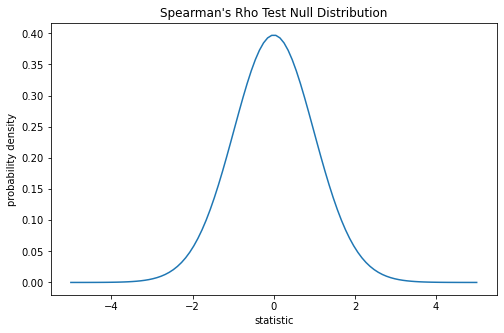

In [41]:
dof = len(tst_ls[1][1])-2  # len(x) == len(y)
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

1.2484858355649224


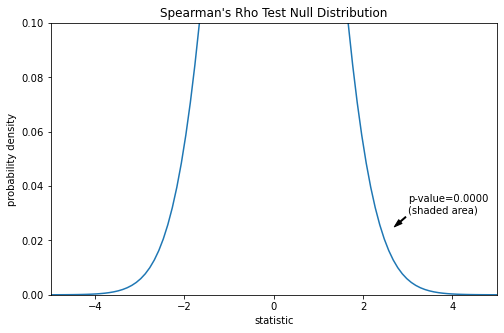

In [52]:
#2 rho values Fisher-transformed; should be significantly above 0 at the group level; i think sooo
##Group level zscore rho
grp_z = np.mean(allz)
print(grp_z)

#for one in pt_files:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
rs = tst_ls[10][2]  # original statistic
transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
pvalue = dist.cdf(-transformed) + dist.sf(transformed)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (2.7, 0.025), (3, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
i = t_vals <= -transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

In [57]:
tst_ls[14]

['sub-CT006_CAT_2023-09-20_10h04.42.078.csv',
 4     2.935185
 5     3.009259
 6     1.018519
 7     1.453704
 8     3.986111
 9     0.347222
 10    2.532407
 11    1.944444
 12    1.458333
 13    1.032407
 14    1.013889
 15    2.495370
 16    3.962963
 17    3.513889
 18    1.439815
 19    3.467593
 20    4.393519
 21    3.513889
 22    1.486111
 23    2.981481
 24    0.504630
 25    2.500000
 26    0.078704
 27    3.050926
 28    0.467593
 29    2.939815
 30    2.611111
 31    3.490741
 32    0.083333
 33    3.041667
 34    1.041667
 35    3.513889
 36    0.000000
 37    4.958333
 38    5.000000
 39    0.532407
 40    1.967593
 41    1.023148
 42    1.995370
 43    3.912037
 44    1.486111
 45    3.657407
 46    1.046296
 47    3.027778
 48    0.495370
 49    2.537037
 50    1.708333
 51    2.453704
 52    3.472222
 53    0.143519
 54    0.000000
 55    0.032407
 56    0.111111
 57    2.962963
 58    0.467593
 59    0.402778
 60    0.726852
 61    1.282407
 62    0.560185
 63    3.0

In [9]:
pt

,timepoint,color,condition,col_val1,col_val2,half_timepoint,trials_thisRepN,trials_thisTrialN,trials_thisN,trials_thisIndex,...,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 48,rho,p_value,zscr
4,3.5,b,continious,"[0, 0, 255]","[0, 0, 255]",1.75,0.0,0.0,0.0,0.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
5,4.5,y-g,boundary,"[255, 255, 0]","[0, 255, 0]",2.25,0.0,1.0,1.0,1.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
6,1.5,y-g,boundary,"[255, 255, 0]","[0, 255, 0]",0.75,0.0,2.0,2.0,2.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
7,1.5,g-y,boundary,"[0, 255, 0]","[255, 255, 0]",0.75,0.0,3.0,3.0,3.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
8,3.5,g-y,boundary,"[0, 255, 0]","[255, 255, 0]",1.75,0.0,4.0,4.0,4.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
9,4.0,y-g,boundary,"[255, 255, 0]","[0, 255, 0]",2.00,0.0,5.0,5.0,5.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
10,0.5,g,continious,"[0, 255, 0]","[0, 255, 0]",0.25,0.0,6.0,6.0,6.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
11,1.5,g,continious,"[0, 255, 0]","[0, 255, 0]",0.75,0.0,7.0,7.0,7.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
12,4.0,g-y,boundary,"[0, 255, 0]","[255, 255, 0]",2.00,0.0,8.0,8.0,8.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
13,2.0,y-g,boundary,"[255, 255, 0]","[0, 255, 0]",1.00,0.0,9.0,9.0,9.0,...,NaN,1,2023-10-19_17h53.37.523,CAT,2022.2.1,59.854685,NaN,0.611869,2.057101e-07,0.711903
